#Breast_Cancer_Classification

## Import Tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Load Data set

In [ ]:
df =pd.read_csv(r"/content/drive/MyDrive/ML Intern/Breast Cancer Classification/Copy of data.csv")

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
print(df.shape)

(569, 33)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(columns=['Unnamed: 32'])


## Exploratory Data Analysis

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


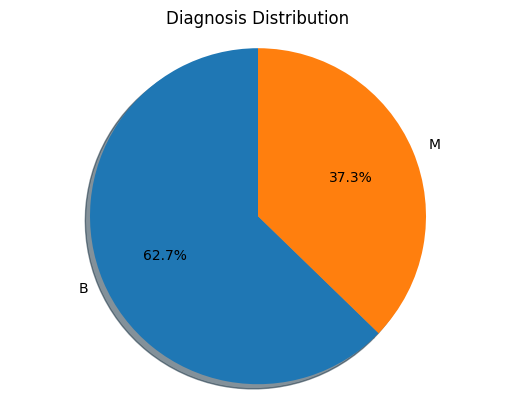

In [ ]:
labels = df['diagnosis'].value_counts().index.to_list()
sizes = df['diagnosis'].value_counts().to_list()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Diagnosis Distribution')
plt.show()


<ipython-input-22-e3eeedd11f85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['id'], axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)


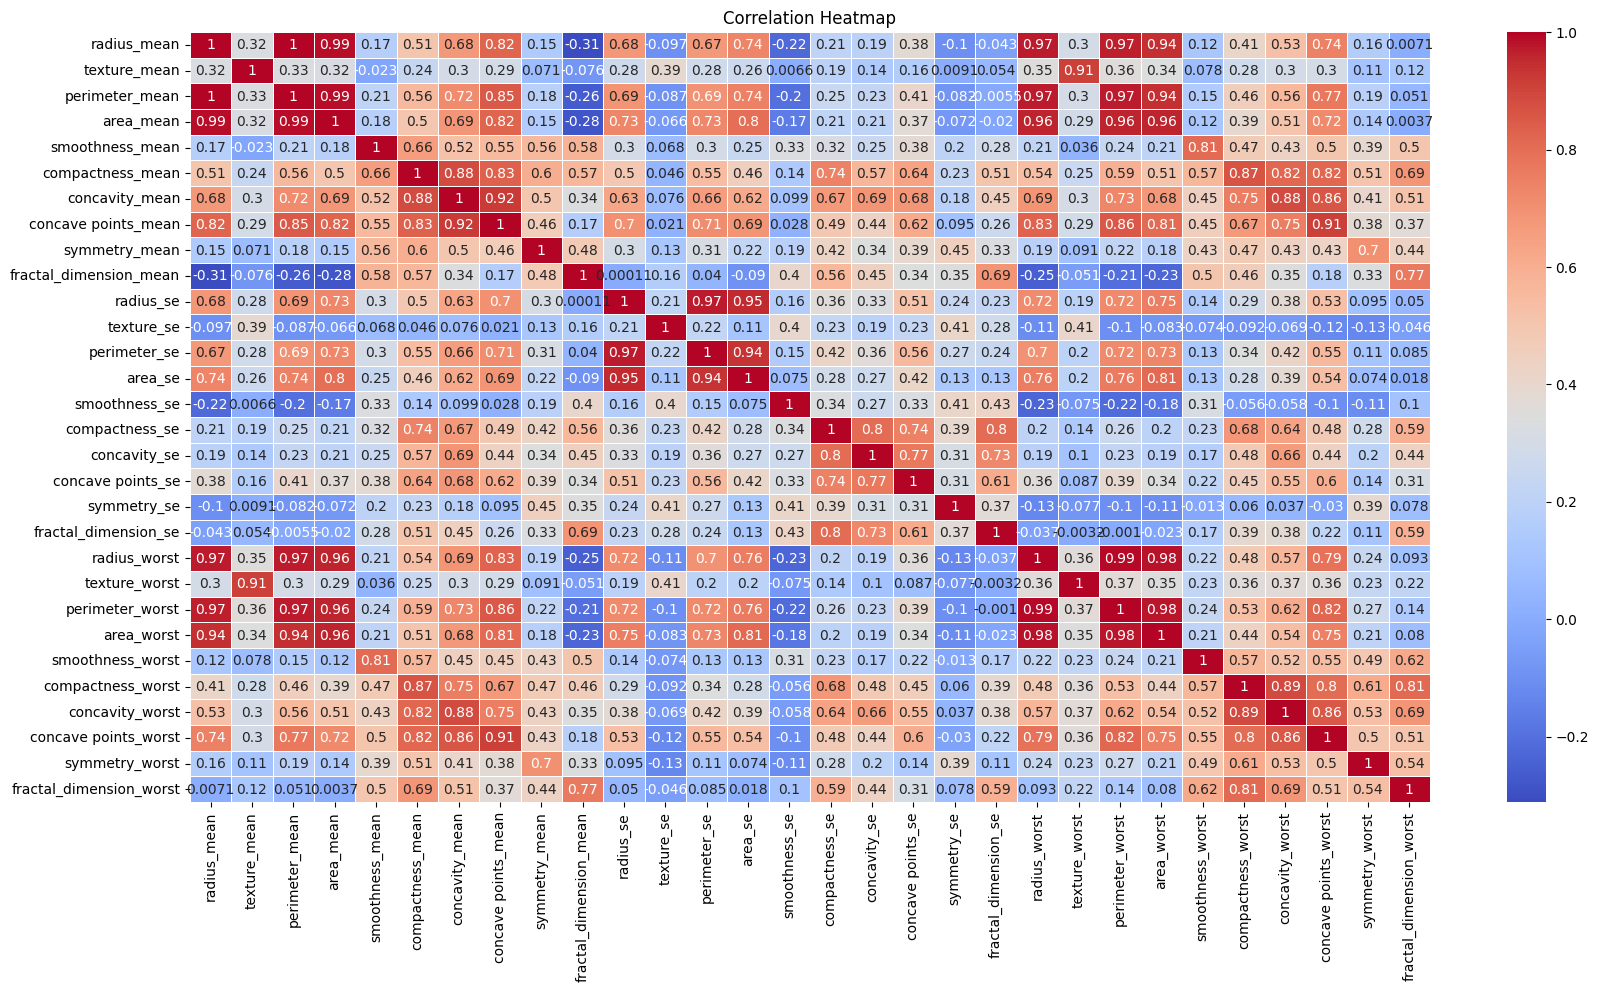

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop(['id'], axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


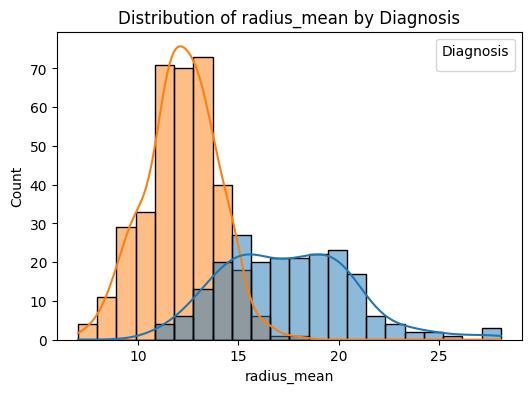

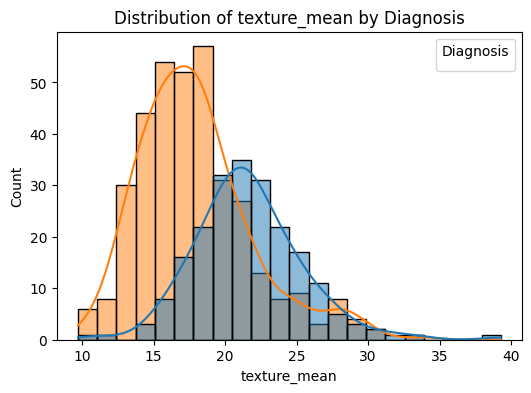

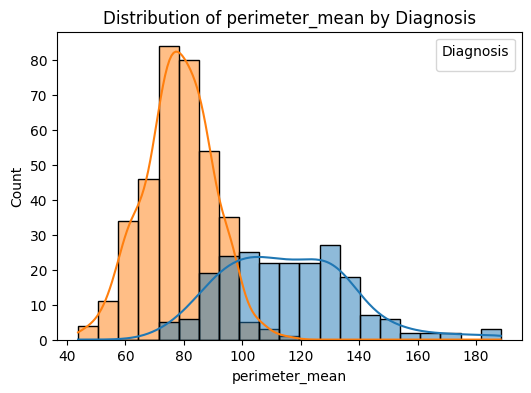

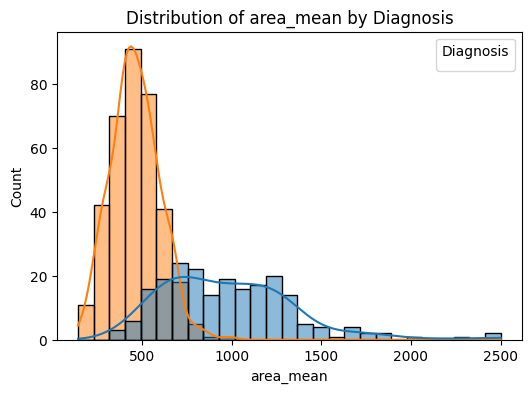

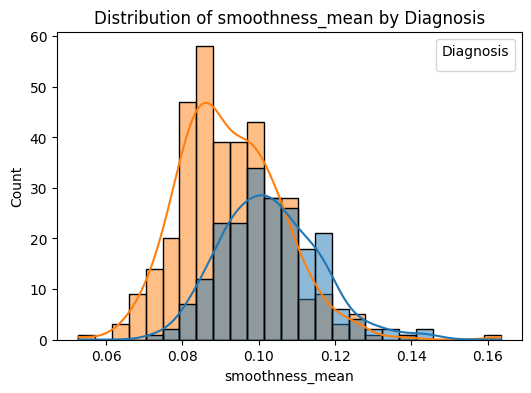

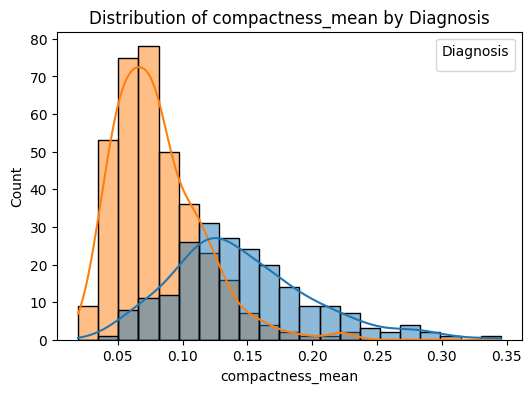

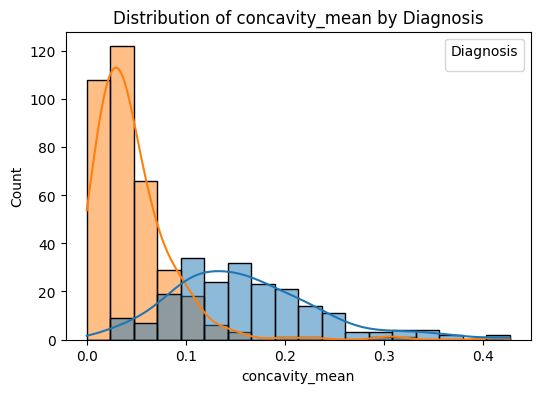

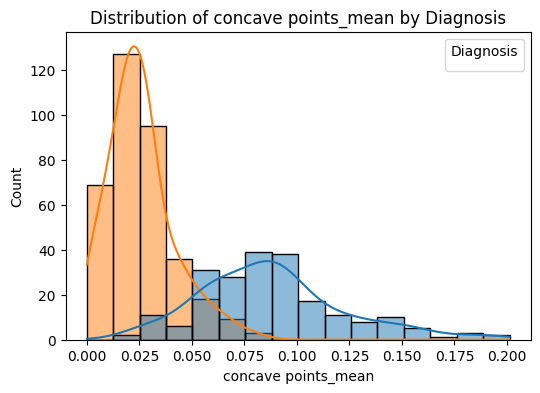

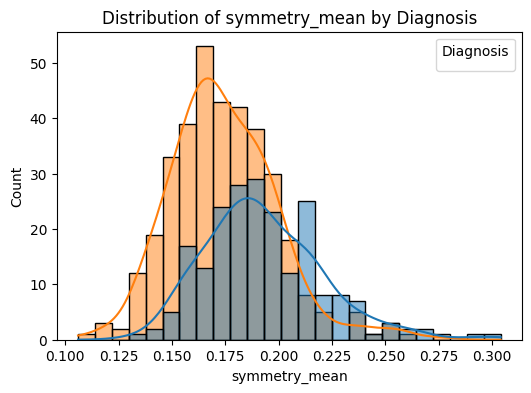

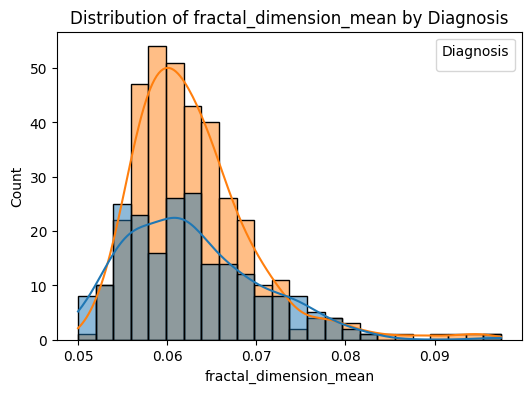

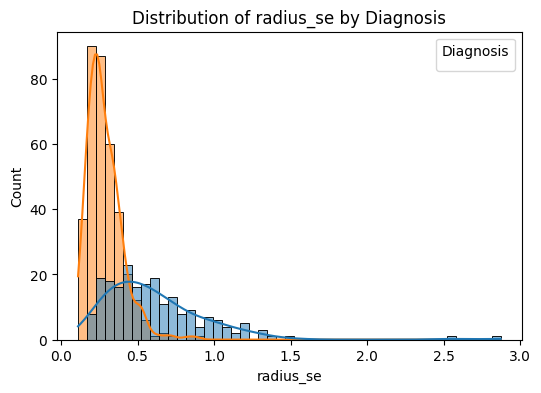

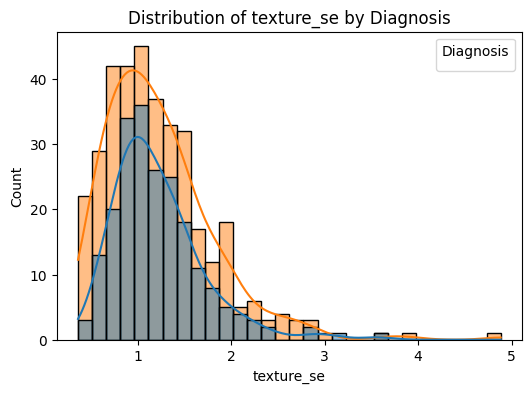

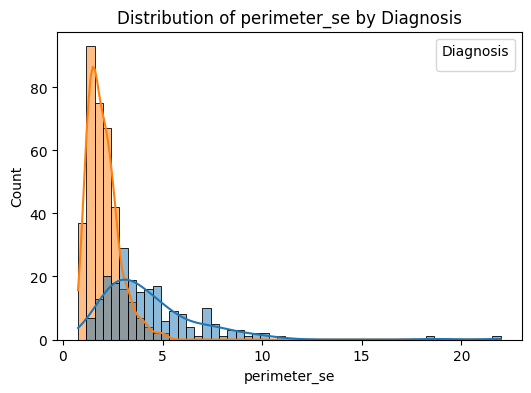

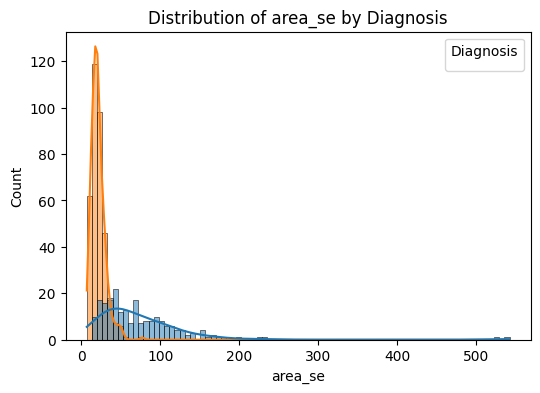

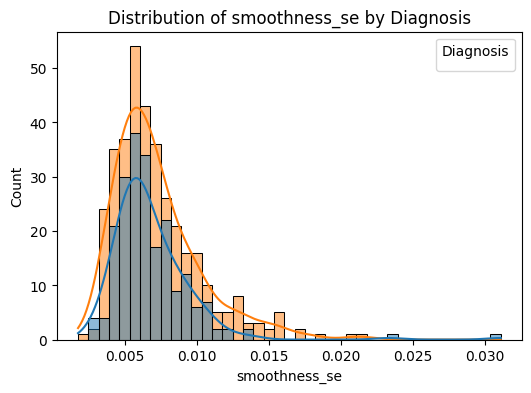

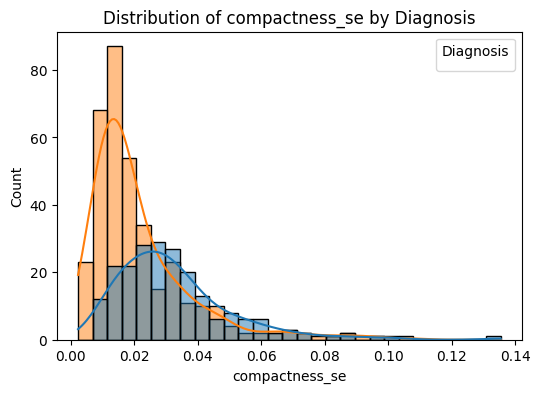

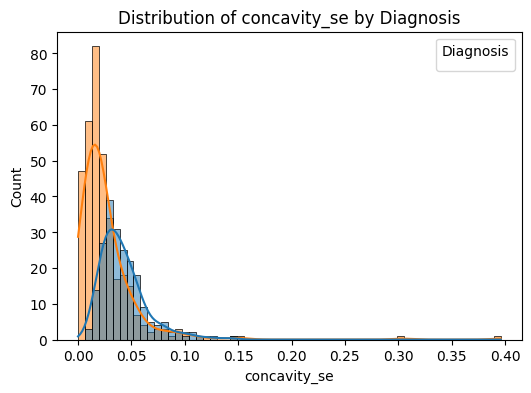

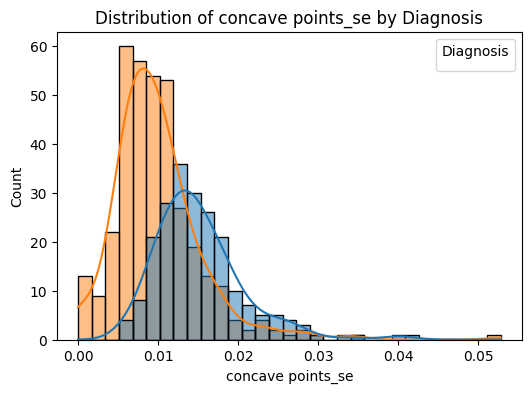

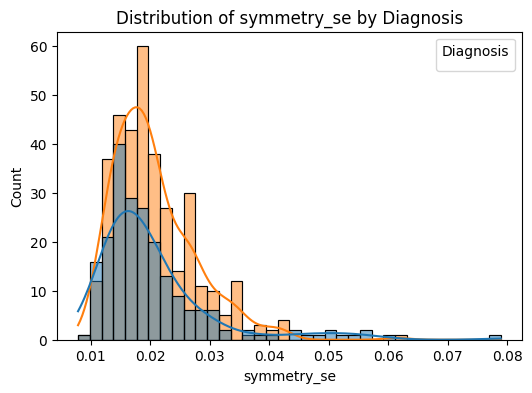

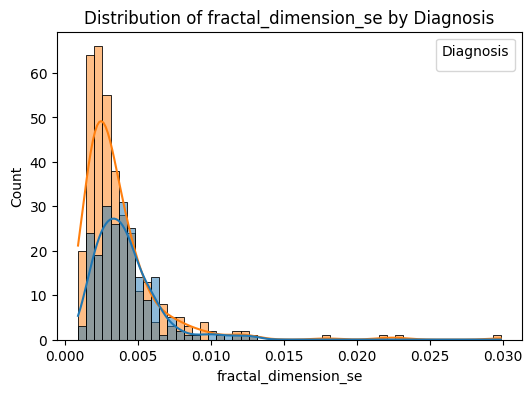

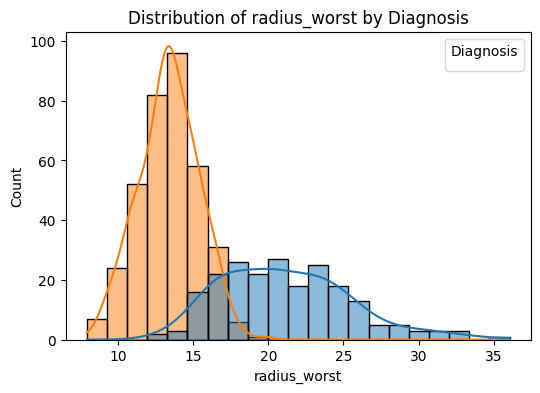

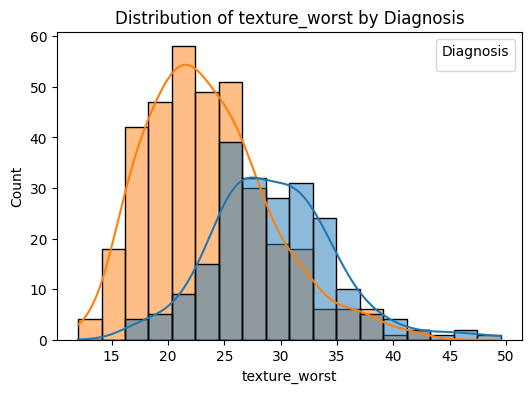

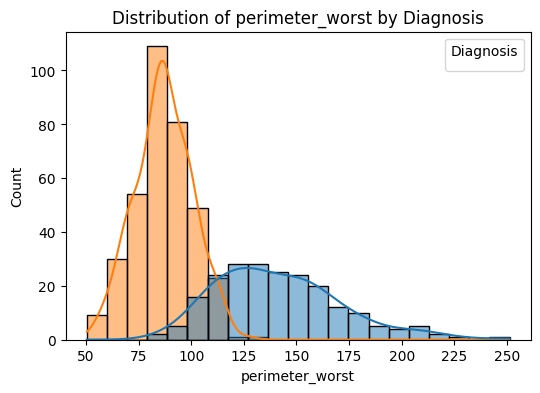

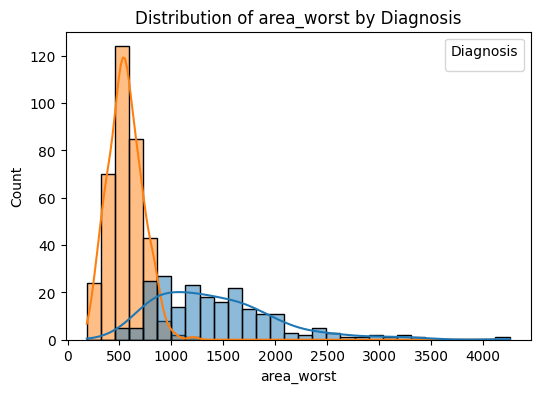

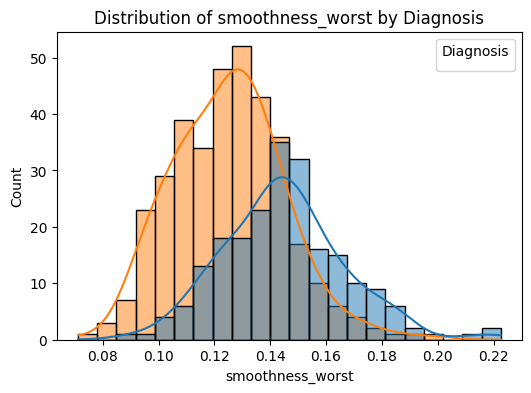

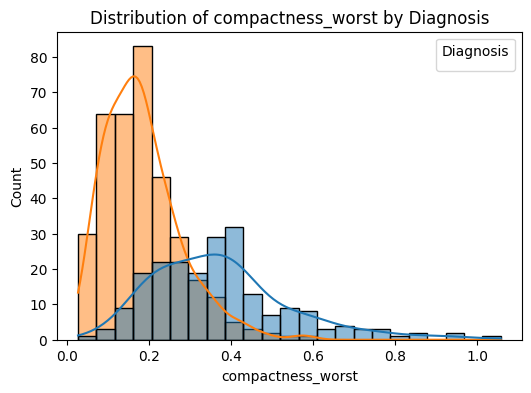

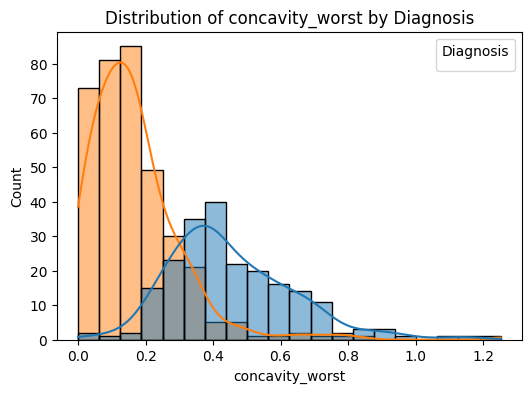

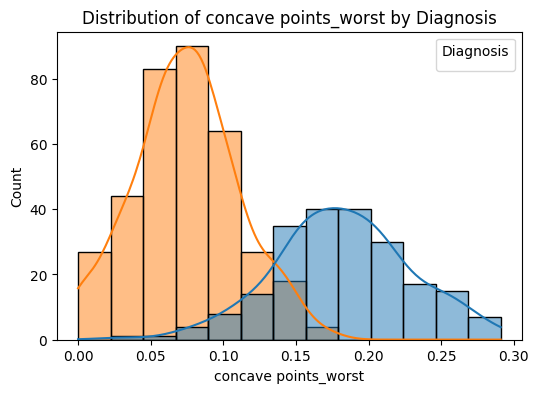

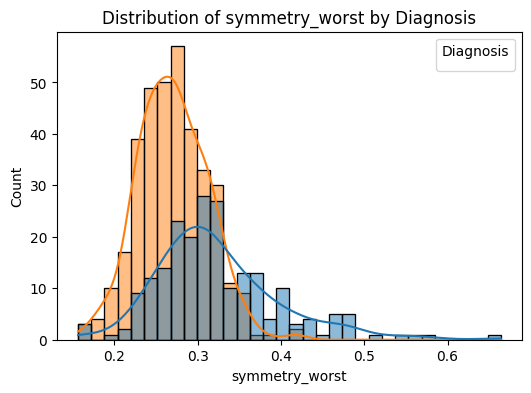

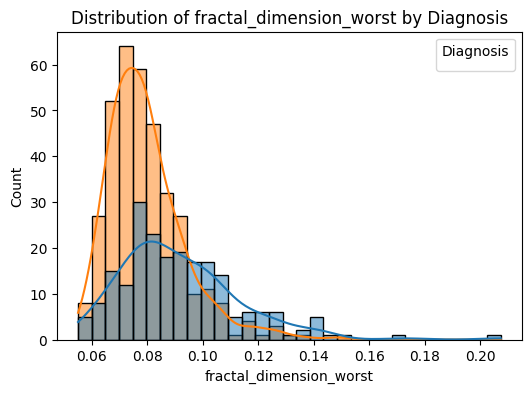

In [ ]:
features = df.columns[2:]  # Exclude 'id' and 'diagnosis' columns
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')
    plt.show()

## Data Preprocessing

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
# Convert diagnosis column to binary (0 for benign, 1 for malignant)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:
# Separate features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models
### K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9473684210526315
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



###Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9473684210526315
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9736842105263158
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

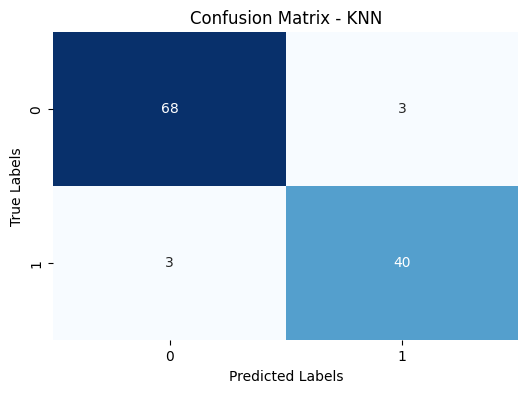

In [ ]:
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix - KNN")

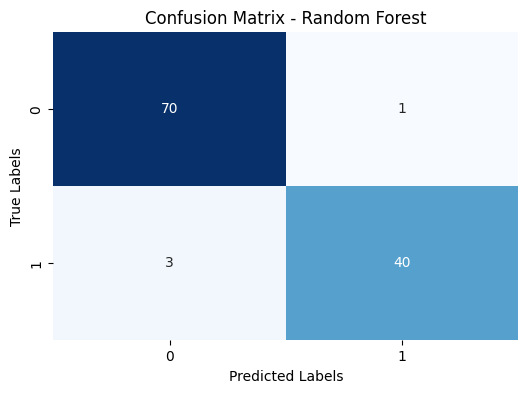

In [ ]:
# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")

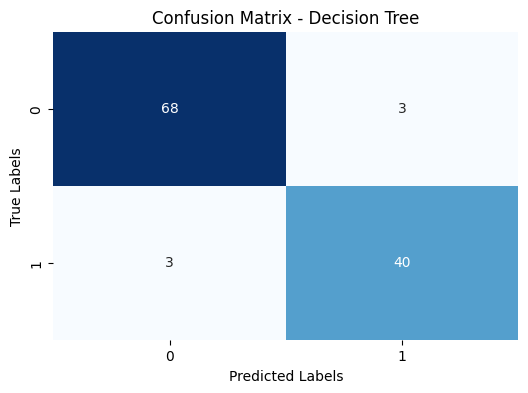

In [ ]:
# Plot confusion matrix for Decision Tree Classifier
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix - Decision Tree")

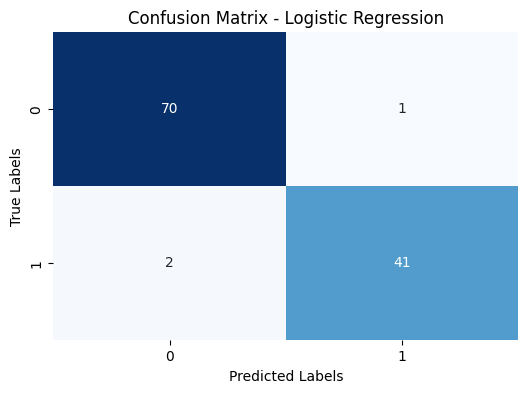

In [ ]:
# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_log_reg, "Confusion Matrix - Logistic Regression")

In [49]:
def preprocess_input(new_input):
    # Convert the input dictionary to a DataFrame
    df_input = pd.DataFrame([new_input])

    # Drop the 'id' and 'Unnamed: 32' columns
    df_input.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

    # Standardize the input features using the same scaler used for training
    df_input_scaled = scaler.transform(df_input)

    return df_input_scaled

In [50]:
def predict_input(new_input):
    # Preprocess the input
    df_input_scaled = preprocess_input(new_input)

    # Predict using each model
    prediction_knn = knn.predict(df_input_scaled)[0]
    prediction_rf = rf_classifier.predict(df_input_scaled)[0]
    prediction_dt = dt_classifier.predict(df_input_scaled)[0]


    # Print predictions
    print("KNN Prediction:", "Malignant" if prediction_knn == 1 else "Benign")
    print("Random Forest Prediction:", "Malignant" if prediction_rf == 1 else "Benign")
    print("Decision Tree Prediction:", "Malignant" if prediction_dt == 1 else "Benign")


In [51]:
# Example usage
new_input = {'id': 842302,
 'radius_mean': 17.99,
 'texture_mean': 10.38,
 'perimeter_mean': 122.8,
 'area_mean': 1001.0,
 'smoothness_mean': 0.1184,
 'compactness_mean': 0.2776,
 'concavity_mean': 0.3001,
 'concave points_mean': 0.1471,
 'symmetry_mean': 0.2419,
 'fractal_dimension_mean': 0.07871,
 'radius_se': 1.095,
 'texture_se': 0.9053,
 'perimeter_se': 8.589,
 'area_se': 153.4,
 'smoothness_se': 0.006399,
 'compactness_se': 0.04904,
 'concavity_se': 0.05373,
 'concave points_se': 0.01587,
 'symmetry_se': 0.03003,
 'fractal_dimension_se': 0.006193,
 'radius_worst': 25.38,
 'texture_worst': 17.33,
 'perimeter_worst': 184.6,
 'area_worst': 2019.0,
 'smoothness_worst': 0.1622,
 'compactness_worst': 0.6656,
 'concavity_worst': 0.7119,
 'concave points_worst': 0.2654,
 'symmetry_worst': 0.4601,
 'fractal_dimension_worst': 0.1189,
 'Unnamed: 32': 'nan'}

predict_input(new_input)

KNN Prediction: Malignant
Random Forest Prediction: Malignant
Decision Tree Prediction: Malignant
